# MS Summer Academy NPS Data Exploration (2016-2017)

## Questsions Asked:

    * How many promoters, passives, and detractors are there in both years? How do the scores differ by year?
    * What track of students had the best experience at the summer academy? What about the worst experience?
    * Did students feel as though the pacing increased as the program went on?
    * Which location had the best overall experience?
    * Did students at the NY location have a better or worse expeience as the program went on?
  

# General NPS Cleaning Process:

- Step 1: Import, Clean, and Aggregate Weeks 1-7 for 2016 Data
- Step 2: Import and Clean Week 8 for 2016 Data
- Step 2.5: Aggregate Weeks 1-7 with Week 8 to produce Full 2016 Dataset
- Step 3: Import and Clean 2017 Data
- Step 3.5: Aggregate Full 2016 Data with 2017 Data to produce Complete Dataset

### Promoters, Passives, Detractors for 2017: 78, 34, 8


In [189]:
# Pandas is a library for basic data analysis
import pandas as pd

# NumPy is a library for advanced mathematical computation
import numpy as np

# MatPlotLib is a library for basic data visualization
import matplotlib.pyplot as plt

# SeaBorn is a library for advanced data visualization
import seaborn as sns

import glob

### Functionalize Data Manipulation code!

In [190]:
sns.set(style="white", context="notebook", palette="deep")

COLOR_COLUMNS = ["#66C2FF", "#5CD6D6", "#00CC99", "#85E085", "#FFD966", "#FFB366", "#FFB3B3", "#DAB3FF", "#C2C2D6"]

sns.set_palette(palette=COLOR_COLUMNS, n_colors=4)

# Data Cleaning and Aggregation

In [191]:
REL_PATH_DIRECTORY = "../datasets/SA_Feedback_Surveys_FINAL/2016/"
ALL_BUT_8_PATH = "Anon*.csv"

THE_8_PATH = "Week 8 Feedback (2016, incomplete) - results.csv"

### Weeks 1-7 (2016)

- NOTE: Data is _slightly_ different across various weeks and locations. **Approach with caution!**

In [192]:
all_but_8_2016_files = glob.glob(REL_PATH_DIRECTORY + ALL_BUT_8_PATH)

In [193]:
all_but_8_2016_files

['../datasets/SA_Feedback_Surveys_FINAL/2016/Anon Week 7 Feedback - Taipei.csv',
 '../datasets/SA_Feedback_Surveys_FINAL/2016/Anon Week 6 Feedback - Tokyo.csv',
 '../datasets/SA_Feedback_Surveys_FINAL/2016/Anon Week 1 Feedback - Singapore.csv',
 '../datasets/SA_Feedback_Surveys_FINAL/2016/Anon Week 7 Feedback - LA.csv',
 '../datasets/SA_Feedback_Surveys_FINAL/2016/Anon Week 4 Feedback - SF.csv',
 '../datasets/SA_Feedback_Surveys_FINAL/2016/Anon Week 5 Feedback - SV.csv',
 '../datasets/SA_Feedback_Surveys_FINAL/2016/Anon Week 4 Feedback - SG.csv',
 '../datasets/SA_Feedback_Surveys_FINAL/2016/Anon Week 6 Feedback - NY.csv',
 '../datasets/SA_Feedback_Surveys_FINAL/2016/Anon Week 5 Feedback - HK.csv',
 '../datasets/SA_Feedback_Surveys_FINAL/2016/Anon Week 1 Feedback - SF.csv',
 '../datasets/SA_Feedback_Surveys_FINAL/2016/Anon Week 2 Feedback - LA.csv',
 '../datasets/SA_Feedback_Surveys_FINAL/2016/Anon Week 6 Feedback - Taipei.csv',
 '../datasets/SA_Feedback_Surveys_FINAL/2016/Anon Week 3 F

## GOAL: Place _Week_ and _Location_ data in each 2016 (not Week 8) DF

In [194]:
filename = "Anon Week 1 Feedback - LA.csv"
fileparts = filename.split(" ")

test_file_path = REL_PATH_DIRECTORY + filename
df_test = pd.read_csv(test_file_path)

In [195]:
week_num, location = int(fileparts[2]), fileparts[5].split(".")[0]

In [196]:
def read_all_files():
    data_arr = list()
    for filename in all_but_8_2016_files:
        # When reading each file, we grab the Week & Location data and add it to two new columns
        week, location = _get_week_and_location(filename)
        df = pd.read_csv(filename)
        df["Week"], df["Location"] = week, location
        data_arr.append(df)
    return data_arr

def _get_week_and_location(filename):
    fileparts = filename.split(" ")
    week, location = int(fileparts[2]), fileparts[5].split(".")[0]
    return week, location

data = read_all_files()

### NOTE: The bad dataframe with `Unnamed: 0` is the `Anon Week 1 Feedback - SV.csv` DF

The `Unnamed: 0` column/feature is measuring Timestamp data (Datetime)

### NOTE: The bad dataframe with no `Timestamp` or `Unnamed: 0` is the `Anon Week 5 Feedback - SF.csv` DF

In [197]:
'''Finds the dataframe with no Timestamp or Unnamed: 0 column and adds a Timestamp column with default string values'''

youre_the_one = None
index_of_df = None
for index, df in enumerate(data):
    if "Unnamed: 0" not in df.columns and "Timestamp" not in df.columns:
        df.insert(0, 'Timestamp', 'NO TIMESTAMP')
        youre_the_one = df
        index_of_df = index
        

youre_the_one.head()


,Timestamp,What track are you in?,How would you rate your overall satisfaction with the Summer Academy this week?,How well is the schedule paced?,Week,Location
0,NO TIMESTAMP,Apps,3,3,5,SF
1,NO TIMESTAMP,Apps,4,3,5,SF
2,NO TIMESTAMP,Apps,4,3,5,SF
3,NO TIMESTAMP,Apps,4,4,5,SF
4,NO TIMESTAMP,Apps,3,3,5,SF


In [198]:
'''Renamed Unnamed: 0 ---> Timestamp'''

data[20] = data[20].rename(columns={'Unnamed: 0': 'Timestamp'})

data[20].head(3)

,Timestamp,What track are you in?,How would you rate your overall satisfaction with the Summer Academy this week?,How well are the tutorials paced?,Week,Location
0,6/24/2016 13:32:01,Games,2,4,1,SV
1,6/24/2016 13:48:09,Apps,3,4,1,SV
2,6/24/2016 13:49:23,Apps,3,3,1,SV


In [199]:
# week_one_through_seven_df = pd.DataFrame(index=index, columns=columns)
# Find a way to grab `week` and `location` data from filenames
# Find all potential unique columns
# Use unique columns to create master DF and put all data into that one (merging, copies)


#Histogram of columns and their frequency
column_names = dict()

for df in data:
    for column in df.columns:
        if column in column_names:
            column_names[column] += 1
        else:
            column_names[column] = 1
            
column_names


{'Timestamp': 39,
 'How would you rate your overall satisfaction with the Summer Academy this week?': 39,
 'How well is the schedule paced?': 33,
 'Week': 39,
 'Location': 39,
 'How well are the tutorials paced?': 6,
 'What track are you in?': 24}

## TODO: Aggregate Schedule and Tutorial data into _Pacing_ column (mutual exclusion)

## Checking Each 2016 (not Week 8) DF for Unique Values

In [200]:
# Functionalized grabbing unique values

def check_unique_values_by_column(col_name):
    unique_values = set()
    for df in data:
        if col_name in df.columns:
            df_vals = df[col_name].unique().tolist()
            unique_values.update(df_vals)
    return unique_values

In [201]:
col_name_list = list(column_names.keys())
col_name_list

['Timestamp',
 'How would you rate your overall satisfaction with the Summer Academy this week?',
 'How well is the schedule paced?',
 'Week',
 'Location',
 'How well are the tutorials paced?',
 'What track are you in?']

### Create Dictionary of Unique Values per Column Name over All Data

In [202]:
uniques_dict = dict()
# For each column name in our list above, we create a dictionary element where...
# KEY: Column Name
# VALUE: All Unique Values for that Column Name across All Data
for index in range(7):
    col_name = col_name_list[index]
    uniques_dict[col_name] = check_unique_values_by_column(col_name)

In [203]:
uniques = list(uniques_dict["How would you rate your overall satisfaction with the Summer Academy this week?"])
uniques

[1, 2, 3, 4, 5, '3', '5', '4', '#REF!']

In [204]:
'''For satisfaction column, map errors  to 0, then change datatype of column to type int '''
  
satisfaction_map = dict(zip(uniques, [1, 2, 3, 4, 5, 4, 3, 5, 0]))

# satisfaction_column = 'How would you rate your overall satisfaction with the Summer Academy this week?'

for df in data:
    if 'How would you rate your overall satisfaction with the Summer Academy this week?' in df:
#         if '#REF!' in df[satisfaction_column]:
        df['How would you rate your overall satisfaction with the Summer Academy this week?'] = df['How would you rate your overall satisfaction with the Summer Academy this week?'].map(satisfaction_map).astype(int)
#         df['How would you rate your overall satisfaction with the Summer Academy this week?'] = df['How would you rate your overall satisfaction with the Summer Academy this week?'].astype(int)
            


for df in data:
    if 'How would you rate your overall satisfaction with the Summer Academy this week?' in df:
        print(df['How would you rate your overall satisfaction with the Summer Academy this week?'].unique(), "\n\n")

    

[3 4 5] 


[3 4 5] 


[2 3 4 5] 


[3 5 4] 


[5 4 3] 


[4 5 3 2] 


[4 3] 


[2 4 5 3] 


[4 5] 


[3 4 5] 


[4 3 5] 


[5 4 3] 


[4 5 3] 


[5 3 1 4] 


[3 4 5 1] 


[4 3 2] 


[2 3 4 5] 


[3 5 4] 


[4 5] 


[3 4 5] 


[2 3 4 5] 


[3 4 5] 


[4 3 2 5 1] 


[4 5 3] 


[3 5 4 2] 


[5 4] 


[3 5 1 4] 


[3 4 5] 


[3 4 5] 


[4 5] 


[5 3 4] 


[5 3 4 1 2] 


[4 5 3 2] 


[5 4] 


[5 4 3] 


[2 3 4 5 1] 


[3 4 5] 


[4 3] 


[3 5 4 0] 




In [205]:
# 2016 NOT Week 8 data dictionary mappings 

''' Mapping Schedule pacing to convert np.NaN and errors to 0 so that we can only deal with values greater than 0 in 
our calculations and making sure values are integers. '''

'''Our collection of mapping dictionaries to deal with np.NaN, #REF!, and wrong datatypes'''

schedule_pacing_map = {
    '#REF!': 0,
    np.NaN: 0, 
    1: 1, 
    2: 2, 
    '2': 2, 
    3: 3, 
    '3': 3, 
    '4': 4, 
    4: 4, 
    5: 5, 
    '5': 5
}


for df in data:
    if "How well is the schedule paced?" in df:
        df["How well is the schedule paced?"] = df["How well is the schedule paced?"].map(schedule_pacing_map)
        df = df.drop(df[df["How well is the schedule paced?"] > 0].index)


In [206]:
for df in data:
    if 'How would you rate your overall satisfaction with the Summer Academy this week?' in df:
        print(df['How would you rate your overall satisfaction with the Summer Academy this week?'].unique(), "\n\n")

[3 4 5] 


[3 4 5] 


[2 3 4 5] 


[3 5 4] 


[5 4 3] 


[4 5 3 2] 


[4 3] 


[2 4 5 3] 


[4 5] 


[3 4 5] 


[4 3 5] 


[5 4 3] 


[4 5 3] 


[5 3 1 4] 


[3 4 5 1] 


[4 3 2] 


[2 3 4 5] 


[3 5 4] 


[4 5] 


[3 4 5] 


[2 3 4 5] 


[3 4 5] 


[4 3 2 5 1] 


[4 5 3] 


[3 5 4 2] 


[5 4] 


[3 5 1 4] 


[3 4 5] 


[3 4 5] 


[4 5] 


[5 3 4] 


[5 3 4 1 2] 


[4 5 3 2] 


[5 4] 


[5 4 3] 


[2 3 4 5 1] 


[3 4 5] 


[4 3] 


[3 5 4 0] 




In [207]:
col_name_list

['Timestamp',
 'How would you rate your overall satisfaction with the Summer Academy this week?',
 'How well is the schedule paced?',
 'Week',
 'Location',
 'How well are the tutorials paced?',
 'What track are you in?']

In [208]:
unique_types = set()

for item in check_unique_values_by_column(col_name_list[0]):
    unique_types.update([type(item)])
    
# unique_types
print(col_name_list[0], ": ", list(unique_types))

Timestamp :  [<class 'str'>, <class 'float'>]


### Checks all unique datatypes across every feature across every dataset

In [209]:
def check_unique_values_by_column(col_name):
    unique_values = set()
    for df in data:
        if col_name in df.columns:
            df_vals = df[col_name].unique().tolist()
            unique_values.update(df_vals)
    return unique_values

In [210]:
# dict_of_unique_types
'''Returns a dict (KEY: Unique Columns in all dataframes, VALUE: Set of unique value types)'''
type_dict = dict()

for feature in range(len(col_name_list)):
    unique_types = set()

    for item in check_unique_values_by_column(col_name_list[feature]):
        unique_types.update([type(item)])

    type_dict[col_name_list[feature]] = list(unique_types)
    
type_dict


{'Timestamp': [str, float],
 'How would you rate your overall satisfaction with the Summer Academy this week?': [int],
 'How well is the schedule paced?': [int],
 'Week': [int],
 'Location': [str],
 'How well are the tutorials paced?': [int],
 'What track are you in?': [str]}

In [211]:
# 'What track are you in?' looks pretty clean
unique_track_vals = check_unique_values_by_column('What track are you in?')
unique_track_vals

{'Apps', 'Average:', 'Games', 'Intro', 'VR'}

## Type Mapper!

In [212]:
def map_types_to_value(df, column_name, type_to_change, change_to_value):
    '''Takes a Pandas Dataframe, column name, object type to change, and the value to replace with
        Returns a "mapped" dataframe based on value types that you want to replace'''
    for index, item in df.iterrows():
        changer = None
        if type(item[0]) == type_to_change:
            changer = change_to_value
            return df.set_value(index, column_name, changer)


In [213]:
# "Example of using the Type Mapper Function"

test = pd.DataFrame(data=["asdf", "zxcv", "qwer", "pou", "ncmv", True], columns=["testing"])

mapped = map_types_to_value(test, "testing", bool, "WORKING")
mapped


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,testing
0,asdf
1,zxcv
2,qwer
3,pou
4,ncmv
5,WORKING


In [214]:
'''Takes NaN values in Timestamp column and maps then to a "NO TIMESTAMP" string'''

'''CURRENTLY NOT CATCHING NAN VALUE, DONT KNOW WHY!'''

for df in data:
    map_types_to_value(df, 'Timestamp', np.nan, "NO TIMESTAMP")

unique_timestamp_vals = check_unique_values_by_column('Timestamp')
# unique_timestamp_vals


### Example of Merging Mutually Exclusive Columns

In [215]:
df1 = pd.DataFrame([1, 0, 3, 4, np.nan, np.nan, 0, 6, np.nan, np.nan, np.nan], columns=["a"])
df2 = pd.DataFrame([np.nan, np.nan, np.nan, np.nan, 5, 7, np.nan, np.nan, 2, 9, 8], columns=["b"])

Step 1: Replace all **NaNs**

In [216]:
df1["a"] = df1["a"].fillna(0)
df2["b"] = df2["b"].fillna(0)

In [217]:
df_final = df1['a'] + df2['b']
df_final

0     1.0
1     0.0
2     3.0
3     4.0
4     5.0
5     7.0
6     0.0
7     6.0
8     2.0
9     9.0
10    8.0
dtype: float64

In [218]:
s1, s2 = "New York", "No Location"
s1 + s2

'New YorkNo Location'

In [219]:
df_final

0     1.0
1     0.0
2     3.0
3     4.0
4     5.0
5     7.0
6     0.0
7     6.0
8     2.0
9     9.0
10    8.0
dtype: float64

In [220]:
pacing_name1 = 'How well is the schedule paced?'
pacing_name2 = 'How well are the tutorials pacecd?'

### Since we know that the `Schedule Pacing` and `Tutorial Pacing` are mutually exclusive columns, we can simply _ADD_ them together into a new column.

### Let's do this last when we have everything in the same dataframe because all we need to do is:
    *Map alls NaNs to 0 for both pacing columns
    *Just add the dataframes together

## Let's Make a 2016 DataFrame

In [221]:
df_2016_no_week_8 = pd.concat(data, ignore_index=True, sort=True)

In [222]:
'''Mutually Exclusive Column Merge for Pacing Data AND dropping not needed columns'''

df_2016_no_week_8["How well are the tutorials paced?"] = df_2016_no_week_8["How well are the tutorials paced?"].fillna(0)
df_2016_no_week_8["How well is the schedule paced?"] = df_2016_no_week_8["How well is the schedule paced?"].fillna(0)

df_2016_no_week_8["Pacing"] = df_2016_no_week_8["How well are the tutorials paced?"] + df_2016_no_week_8["How well is the schedule paced?"]

df_2016_no_week_8.drop(columns=['How well are the tutorials paced?', 'How well is the schedule paced?'], inplace=True)
df_2016_no_week_8["How would you rate your overall satisfaction with the Summer Academy this week?"] = df_2016_no_week_8["How would you rate your overall satisfaction with the Summer Academy this week?"].transform(lambda x: x * 2)

df_2016_no_week_8["Year"] = "2016"

'''Renaming columns to prepare for merge, dropping columns, filling nans'''

df_2016_no_week_8 = df_2016_no_week_8.rename(columns={'How would you rate your overall satisfaction with the Summer Academy this week?': 'Rating (Num)', 'What track are you in?': 'Track', 'Pacing': 'Schedule Pacing'})
df_2016_no_week_8.drop(columns=['Timestamp'], inplace=True)

# df_2016_no_week_8["Track"].unique()
# df_2016_no_week_8.head(3)





df_2016_no_week_8.head(3)

,Rating (Num),Location,Week,Track,Schedule Pacing,Year
0,6,Taipei,7,NaN,3.0,2016
1,8,Taipei,7,NaN,3.0,2016
2,8,Taipei,7,NaN,3.0,2016


In [223]:
df["What track are you in?"] = df["What track are you in?"].fillna("Unspecified")
df.head()

,Timestamp,What track are you in?,How would you rate your overall satisfaction with the Summer Academy this week?,How well is the schedule paced?,Week,Location
0,7/8/2016 12:52:08,Games,3,2,3,SV
1,7/9/2016 15:22:45,Apps,3,3,3,SV
2,7/8/2016 21:26:01,Games,5,3,3,SV
3,7/8/2016 13:52:01,Apps,5,3,3,SV
4,7/8/2016 14:00:28,Apps,5,4,3,SV


In [224]:
df_2016_no_week_8.columns

Index(['Rating (Num)', 'Location', 'Week', 'Track', 'Schedule Pacing', 'Year'], dtype='object')

In [225]:
'''FAILED ATTEMPTS AT TRYING TO MERGE PACING COLUMNS INTO ONE COLUMN BY UNNECECARILY DIFFICULT MEANS'''


# pacing_df =  pd.DataFrame(columns= ['How well is the schedule paced?','How well are the tutorials paced?'])

# array_of_columns = list()


# for df in data:
#     if 'How well is the schedule paced?' in df.columns:
#         array_of_columns.append(df['How well is the schedule paced?'])
#         nan_df = pd.DataFrame(np.nan, index=df['How well is the schedule paced?'].size, columns='How well are the tutorials paced?')
#         array_of_columns.append(nan_df)
# #         pacing_df['How well is the schedule paced?'] = pacing_df['How well is the schedule paced?'] + df['How well is the schedule paced?']
#     elif 'How well are the tutorials paced?' in df.columns:
#         array_of_columns.append(df['How well are the tutorials paced?'])
#         nan_df = pd.DataFrame(np.nan, index=df['How well are the tutorials paced?'].size, columns='How well are the tutorials paced?')
#         array_of_columns.append(nan_df)
        
        
# #         pacing_df[ 'How well are the tutorials paced?'] = pacing_df['How well are the tutorials paced?'] + df['How well are the tutorials paced?']
        
# pacing_df



# # ------------------------------------------------------------------------------------------------------------


# pacing_df =  pd.DataFrame(columns= ['How well is the schedule paced?','How well are the tutorials paced?'])
# p1 = list()
# p2 = list()




# for df in data:
#     if 'How well is the schedule paced?' in df.columns:
#         p1.append(df['How well is the schedule paced?'].values)
#         temp_arr = [p1.append(i) for i in df['How well is the schedule paced?'].values]
#         p2.append(np.nan * (df['How well is the schedule paced?'].size))
# #         p1.append(df['How well is the schedule paced?'].values)

#     elif 'How well are the tutorials paced?' in df.columns:
#         temp_arr = [p2.append(i) for i in df['How well are the tutorials paced?'].values]
#         p2.append(np.nan * (df['How well are the tutorials paced?'].size))

        
# #         pacing_df[ 'How well are the tutorials paced?'] = pacing_df['How well are the tutorials paced?'] + df['How well are the tutorials paced?']
        
# p1
# # p2

'FAILED ATTEMPTS AT TRYING TO MERGE PACING COLUMNS INTO ONE COLUMN BY UNNECECARILY DIFFICULT MEANS'

In [226]:
df_week_8["Track"].unique()

array(['Apps', 'Intro', 'Apps, Explorer', 'Games', 'VR',
       'Games, Explorer'], dtype=object)

### Week 8 (2016)

In [227]:
df_week_8 = pd.read_csv(REL_PATH_DIRECTORY + THE_8_PATH)

In [228]:
df_week_8["Week"] = 8
df_week_8.rename(columns={"location": "Location"}, inplace=True)
df_week_8.rename(columns={"How likely is it that you would recommend the Make School Summer Academy to a friend?": "Rating (Num)"}, inplace=True)
df_week_8.rename(columns={"track": "Track"}, inplace=True)

df_week_8.drop(columns=['#', 'Network ID', 'Start Date (UTC)', 'Submit Date (UTC)'], inplace=True)



track_uniques_week_8 = ['summerApps', 'summerIntro', 'summerApps (4-week)', 'summerGames', 'summerVR', 'summerGames (4-week)']

# ['Unspecified', 'Intro', 'Games', 'Apps', 'VR', 'Average:', 'Apps, Explorer', 'Games, Explorer']

track_mapper_week_8 = dict(zip(track_uniques_week_8, ["Apps", "Intro", "Apps, Explorer", "Games", "VR", "Games, Explorer" ]))


df_week_8['Track'] = df_week_8['Track'].map(track_mapper_week_8)


df_week_8['Schedule Pacing'] = 0
df_week_8['Year'] = "2016"

## MAY NEED TO MAP TRACKS IN WEEK 8 TO THE SAME NAMES IN THE_TRUTH

# df_week_8["Week"].unique()
df_week_8.head(3)



,Rating (Num),Location,Track,Week,Schedule Pacing,Year
0,10,New York,Apps,8,0,2016
1,10,San Francisco,Intro,8,0,2016
2,10,New York,Intro,8,0,2016


### 2017

In [229]:
FILEPATH = "../datasets/SA_Feedback_Surveys_FINAL/2017/Student_Feedback_Surveys_Superview.csv"
df_2017 = pd.read_csv(FILEPATH)

# 9 or 10 are promoters
# 7-8 are passives
# 0-6 are detractors

# df_2017.head()

# Clean Week data to remove redundant "week"

week_mapper = {
    "Week 1": 1,
    "Week 2": 2,
    "Week 3": 3,
    "Week 4": 4,
    "Week 5": 5,
    "Week 6": 6,
    "Week 7": 7,
    "Week 8": 8
}

df_2017["Week"] = df_2017["Week"].map(week_mapper)


In [230]:
df_2017["Year"] = "2017"

### Map Pacing Strings to Numerical Values

In [231]:
pacing_mapper = {
    'Way too slow': 1,
    'A little too slow': 2,
    'Just right': 3,
    'A little too fast': 4,
    'Way too fast': 5,
    np.nan: 0
}

df_2017["Schedule Pacing"] = df_2017["Schedule Pacing"].map(pacing_mapper)

# df_2017

In [232]:
'''Dataframe Cleaning'''

df_2017.drop(columns=['ID'], inplace=True)

In [233]:
df_2016_no_week_8.head()

,Rating (Num),Location,Week,Track,Schedule Pacing,Year
0,6,Taipei,7,NaN,3.0,2016
1,8,Taipei,7,NaN,3.0,2016
2,8,Taipei,7,NaN,3.0,2016
3,8,Taipei,7,NaN,4.0,2016
4,10,Taipei,7,NaN,4.0,2016


## The Truth

In [234]:
# Filling NaNs in Track and Location in the_truth
the_truth = pd.concat([df_2016_no_week_8, df_2017, df_week_8], ignore_index=True, sort=True)
the_truth["Track"] = the_truth["Track"].fillna("Unspecified")
the_truth["Location"] = the_truth["Location"].fillna("Unspecified")
# the_truth.drop(columns=['Timestamp'], inplace=True)
# the_truth.drop(columns=['ID'], inplace=True)

In [235]:
the_truth.head(3)

,Location,Rating (Num),Schedule Pacing,Track,Week,Year
0,Taipei,6,3.0,Unspecified,7,2016
1,Taipei,8,3.0,Unspecified,7,2016
2,Taipei,8,3.0,Unspecified,7,2016


In [236]:
# Clean Rating (Num) in the_truth


old_rating_values = the_truth["Rating (Num)"].value_counts().keys().tolist()

new_rating_value = [8, 8, 9, 10, 10, 7, 6, 6, 5, 4, 9, 0, 4, 3, 2, 7, 0, 2, 1, 5, 3, 0]

the_truth = the_truth.replace(old_rating_values, new_rating_value)

the_truth["Rating (Num)"].unique()



# the_truth['Rating (Num)'] = the_truth['Rating (Num)'].map(rating_num_mapper).astype(int)


# the_truth["Rating (Num)"].unique()

array([ 6,  8,  9,  4,  0,  1,  2, 10,  3,  5,  7])

## Calculate NPS scores

In [237]:
# ALL students during week 7 from 2016-17
the_truth_week_7 = the_truth[the_truth["Week"] == 8]
the_truth_week_7.tail()

,Location,Rating (Num),Schedule Pacing,Track,Week,Year
2440,San Francisco,9,0.0,Apps,8,2016
2441,San Francisco,1,0.0,VR,8,2016
2442,San Francisco,9,0.0,"Games, Explorer",8,2016
2443,San Francisco,9,0.0,Intro,8,2016
2444,Sunnyvale,9,0.0,Games,8,2016


In [238]:
df_promoters = the_truth.loc[(the_truth['Rating (Num)'] >= 9) & (the_truth['Week'] == 8)]
df_passives = the_truth.loc[(the_truth['Rating (Num)'] >= 7) & (the_truth['Rating (Num)'] <= 8) & (the_truth['Week'] == 8)]
df_detractors = the_truth.loc[(the_truth['Rating (Num)'] < 7) & (the_truth['Week'] == 8)]

In [239]:
NPS_score = ((len(df_promoters) - len(df_detractors))/(len(df_detractors) + len(df_passives) + len(df_promoters)))*100

NPS_score

# len(df_promoters) #49
# len(df_passives) #19
# len(df_detractors) #6


# df_promoters
# df_passives
# df_detractors   

48.64864864864865

## Two choices for Pro-Pas-Det Data Divisions:

- **Divide** up your promoters, passives, and detractors into _three_ independent DataFrames
- **Convert** your logic for promoter, passive, and detractor identifiation into _arguments_ that you can pass to your global DataFrame at anytime

# Data Visualizations

### Questions:
* How many promoters, passives, and detractors are there in both years? How do the scores differ by year?
* What track of students had the best experience at the summer academy? What about the worst experience?
* Did students feel as though the pacing increased as the program went on?
* Which location had the best overall experience?
* Did students at the NY location have a better or worse expeience as the program went on?

In [240]:
the_truth.head(3)

,Location,Rating (Num),Schedule Pacing,Track,Week,Year
0,Taipei,6,0.0,Unspecified,2,2016
1,Taipei,8,0.0,Unspecified,2,2016
2,Taipei,8,0.0,Unspecified,2,2016


In [241]:
the_truth["Location"].unique()

array(['Taipei', 'Tokyo', 'Singapore', 'LA', 'SF', 'SV', 'SG', 'NY', 'HK',
       'San Francisco', 'Los Angeles', 'Unspecified', 'New York City',
       'Redwood City', 'Santa Clara', 'Oakland', 'Washington DC',
       'Chicago', 'Atlanta', 'Hong Kong', 'Beijing', 'New York',
       'Sunnyvale'], dtype=object)

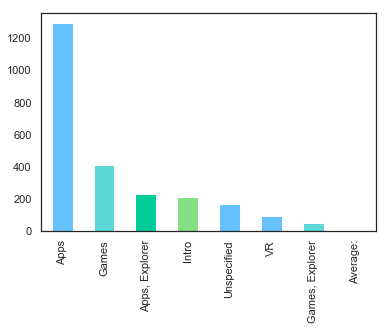

In [242]:
the_truth["Track"].value_counts().plot(kind='bar')